<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana5/Simulaci%C3%B3n_Montecarlo_con_Cadenas_de_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import networkx as nx    # https://networkx.org/documentation/stable/index.html


from random import seed
from random import random
import matplotlib.pyplot as plt

In [2]:
estados = range(3)
#Matriz de transición o matriz estocástica

MT = np.array([[0.2, 0.7, 0.1],
               [0.9, 0.0, 0.1],
               [0.2, 0.8, 0.0]])
pd.DataFrame(MT, index = estados, columns = estados)

,0,1,2
0,0.2,0.7,0.1
1,0.9,0.0,0.1
2,0.2,0.8,0.0


In [3]:
MT.sum(axis=1)  #asegurar que los renglones sumen 1

array([1., 1., 1.])

# Calcular la probabilidad de tener cierto estado en un tiempo t

In [4]:
T = 5                             # tiempo 
s0 = 2
sf = 1

Ps_t = np.zeros(shape=(T+1,len(estados)))     # vector de probabilidad en cada tiempo
Ps_t[0,s0] = 1                                # probabilidad asociada en el estado inicial
 

for t in range(1, T+1):
  Ps_t[t,:] = np.dot(Ps_t[t-1], MT) 

Ps_t[T, sf]                                   # Probabilidad de tener cierto estado en el tiempo t

0.51268

In [5]:
Ps_t

array([[0.     , 0.     , 1.     ],
       [0.2    , 0.8    , 0.     ],
       [0.76   , 0.14   , 0.1    ],
       [0.298  , 0.612  , 0.09   ],
       [0.6284 , 0.2806 , 0.091  ],
       [0.39642, 0.51268, 0.0909 ]])

In [6]:
def calcula_probabilidad_estado (sf, s0, T, MT, estados):
    Ps_t = np.zeros(shape=(T+1,len(estados)))     # vector de probabilidad en cada tiempo
    Ps_t[0,s0] = 1                                # probabilidad asociada en el estado inicial
 

    for t in range(1, T+1):
      Ps_t[t,:] = np.dot(Ps_t[t-1], MT) 

    print(Ps_t[T, sf])
    return Ps_t

In [7]:
Ps_t = calcula_probabilidad_estado(sf=1, s0=2, T=50
                                   , MT = MT, estados=estados)

0.4171122892386748


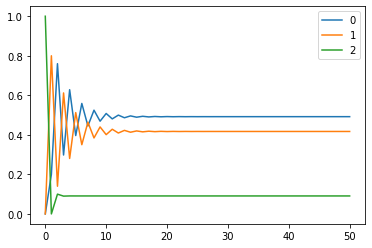

In [8]:
df_Ps_t = pd.DataFrame(Ps_t, columns = estados)
df_Ps_t.plot()
plt.show()

In [9]:
Ps_t = calcula_probabilidad_estado(sf=1, s0=2, T=50
                                   , MT = MT, estados=estados)
Ps_t[-2:]

0.4171122892386748


array([[0.4919786 , 0.41711231, 0.09090909],
       [0.49197862, 0.41711229, 0.09090909]])

# Caminata aleatoria

In [10]:
def Caminata_aleatoria(MT, estado_i, n_iter):
  '''Se implementa una camnata aleatoria para encontrar la distribución 
  estacionaria a partir de la matriz de transición. A pesar de que el estado 
  inicial es un parametro de la función, se puede comprobar que la distribución
  estacionaria es independiente del estado inicial
  MT: Matriz (numpy) de transición de estados tamaño s x s, siendo s cada uno de los estados'''

  estados = range(len(MT)) 
  
  #inicialiaemos en 0 la cuenta para cada estado
  cuenta = np.zeros_like(estados)
  evolucion = np.array([cuenta]) 
  
  s = estado_i
  cuenta[s] += 1

  #iterar n_iter veces
  z = 1
  while (z != n_iter): 
        s1 = int(np.random.choice(estados, 1, p=MT[s]) )
        cuenta[s1] += 1
        evolucion = np.append(evolucion, np.array([cuenta])/z, axis=0)
        s = s1
        z += 1
  
  evolucion = pd.DataFrame(evolucion)

  #Obtenemos la Medida Invariante o Distribución Estacionaria
  r = evolucion.iloc[-1]   

  #Gráfica de convergencia de la medida invariante
  plt.figure(figsize=(16, 6))
  evolucion.plot()
  plt.xlim(0, n_iter)
  plt.ylim(0, 1)
  plt.xlabel('n')
  plt.title('Convergencia Distribución Estacionaria')
  plt.show()
  print('Distribución estacionaria: \n\n',r.values)
  return evolucion
  # return r

<Figure size 1152x432 with 0 Axes>

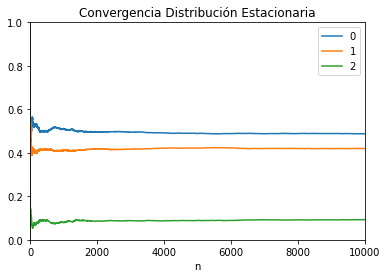

Distribución estacionaria: 

 [0.48724872 0.41974197 0.09310931]


,0,1,2
0,0.000000,0.000000,0.000000
1,0.000000,1.000000,1.000000
2,0.500000,0.500000,0.500000
3,0.333333,0.666667,0.333333
4,0.500000,0.500000,0.250000
...,...,...,...
9995,0.487244,0.419710,0.093147
9996,0.487195,0.419768,0.093137
9997,0.487246,0.419726,0.093128
9998,0.487197,0.419784,0.093119


In [11]:
t= 10000
s0 = 2
Caminata_aleatoria(MT, s0 , 10000)

## Cómo funcionaria para una variable iid

In [12]:
estados = ['lluvioso', 'nublado', 'soleado']
M = np.array([[0.35, 0.43, 0.22],
              [0.35, 0.43, 0.22],
              [0.35, 0.43, 0.22]])
pd.DataFrame(M, index = estados, columns = estados)


,lluvioso,nublado,soleado
lluvioso,0.35,0.43,0.22
nublado,0.35,0.43,0.22
soleado,0.35,0.43,0.22


<Figure size 1152x432 with 0 Axes>

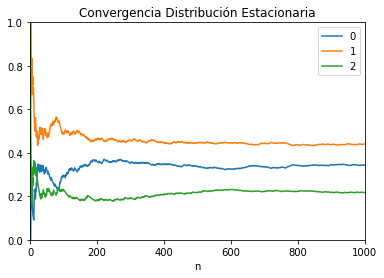

Distribución estacionaria: 

 [0.34334334 0.44044044 0.21721722]


,0,1,2
0,0.000000,0.000000,0.000000
1,0.000000,1.000000,1.000000
2,0.000000,1.000000,0.500000
3,0.333333,0.666667,0.333333
4,0.250000,0.750000,0.250000
...,...,...,...
995,0.343719,0.439196,0.218090
996,0.343373,0.439759,0.217871
997,0.344032,0.439318,0.217653
998,0.343687,0.439880,0.217435


In [13]:
Caminata_aleatoria(M, 1, 1000)

# Otro ejemplo

In [14]:
estados = ['crecimiento', 'recesión_med', 'receción_sev']
M = np.array([[0.971, 0.029, 0],
              [0.145, 0.778, 0.077],
              [0, 0.508, 0.492]])
pd.DataFrame(M, index = estados, columns = estados)


,crecimiento,recesión_med,receción_sev
crecimiento,0.971,0.029,0.000
recesión_med,0.145,0.778,0.077
receción_sev,0.000,0.508,0.492


<Figure size 1152x432 with 0 Axes>

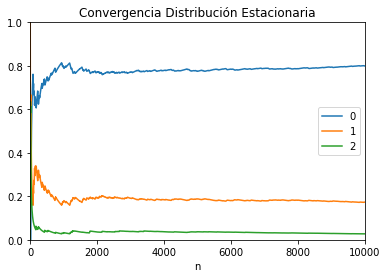

Distribución estacionaria: 

 [0.79947995 0.17321732 0.02740274]


,0,1,2
0,0.00000,0.000000,0.000000
1,0.00000,2.000000,0.000000
2,0.00000,1.500000,0.000000
3,0.00000,1.333333,0.000000
4,0.00000,1.250000,0.000000
...,...,...,...
9995,0.79940,0.173287,0.027414
9996,0.79942,0.173269,0.027411
9997,0.79944,0.173252,0.027408
9998,0.79946,0.173235,0.027405


In [15]:
Caminata_aleatoria(M, 1, 10000)